In [2]:
import pandas as pd
import func
import os

## Import and read data

In [3]:
animal_name = 'SZ035'
session_filename = 'data_2023-08-09_22-28-36.txt'
lab_dir = os.path.join('C:\\', 'Users', 'Shichen', 'OneDrive - Johns Hopkins', 'ShulerLab')
behav_dir = os.path.join(lab_dir, 'behavior_code', 'data', animal_name, session_filename)

In [4]:
pi_events = pd.read_csv(behav_dir, na_values=['None'], skiprows=3)

## Extract behavior events and arrange them by trials

In [5]:
import pandas as pd
import numpy as np


def extract_raw_trial(pi_events_df):
    pi_no_cam = pi_events_df[pi_events_df.key != "camera"]
    pi_no_cam.reset_index(drop=True, inplace=True)
    pnc = pi_no_cam
    total_poke = int(len(pnc[pnc.key == "head"]) / 2)
    pi_trials = pd.DataFrame(index=range(total_poke), columns=["port", "entry", "exit", "rewards", "licks", "phase"])
    poke_num = 0
    for i in range(len(pnc)):
        event_type = [int(pnc.iloc[i, 7]), pnc.iloc[i, 8]]
        if event_type == [1, 'head']:
            pi_trials.port[poke_num] = pnc.port[i]
            pi_trials.entry[poke_num] = pnc.task_time[i]
            pi_trials.phase[poke_num] = pnc.phase[i]
            lick_arr = []
            reward_arr = []
        if event_type == [1, 'lick']:
            lick_arr.append(pnc.task_time[i])
        if event_type == [1, 'reward']:
            reward_arr.append(pnc.task_time[i])
        if event_type == [0, 'head']:
            pi_trials.licks[poke_num] = lick_arr
            pi_trials.rewards[poke_num] = reward_arr
            pi_trials.exit[poke_num] = pnc.task_time[i]
            poke_num = poke_num + 1
    pi_trials = pi_trials[~pd.isna(pi_trials["exit"])]
    pi_trials = pi_trials[~pd.isna(pi_trials["entry"])]
    pi_trials = pi_trials[~pd.isna(pi_trials["port"])]
    pi_trials.reset_index(drop=True, inplace=True)

    # region Extract secondary features
    pi_trials["stay"] = pi_trials.exit - pi_trials.entry
    num_reward = np.empty(len(pi_trials), dtype='int')
    num_lick = np.empty(len(pi_trials), dtype='int')
    port_sign = np.empty(len(pi_trials), dtype='int')
    for i in range(len(pi_trials)):
        num_reward[i] = len(pi_trials.rewards[i])
        num_lick[i] = len(pi_trials.licks[i])
        if pi_trials.port[i] == 2:
            port_sign[i] = -1
        else:
            port_sign[i] = 1
    pi_trials["num_reward"] = num_reward
    pi_trials["num_lick"] = num_lick
    pi_trials["port_sign"] = port_sign
    # endregion

    return pi_trials

In [6]:
pi_trials = extract_raw_trial(pi_events)

## Visualize the behavior events

In [7]:
import matplotlib
import matplotlib.pyplot as plt


def plot_behav_events(pi_events):
    pi_trials = extract_raw_trial(pi_events)
    plt.rcParams["figure.figsize"] = (15, 5)
    plt.style.use("fivethirtyeight")
    for i in range(len(pi_trials.index)):
        x = pi_trials.entry[i]
        y = pi_trials.stay[i] * pi_trials.port_sign[i]
        if pi_trials.port_sign[i] > 0:
            c = 'lightblue'
        else:
            c = 'yellowgreen'
        plt.plot([x/60, x/60], [0, y], c=c, zorder=0)
        if len(pi_trials.rewards[i]) > 0:
            reward_time = (pi_trials.rewards[i] - x) * pi_trials.port_sign[i]
            plt.scatter([x/60]*len(reward_time), reward_time, c='blueviolet', marker='*', zorder=1)

    # todo: make histogram of lick frequencies
    # todo: find a way to quantify if the mouse is engaged in the task (in-port vs. in-between?)
    # todo: quantify how often the unwanted in-and-out occurs

    plt.xlabel("Time since session starts (min)")
    plt.ylabel("Time since port entry (sec)")
    plt.xlim([-0.1,max(pi_trials.exit)/60 + 0.1])
    plt.show()

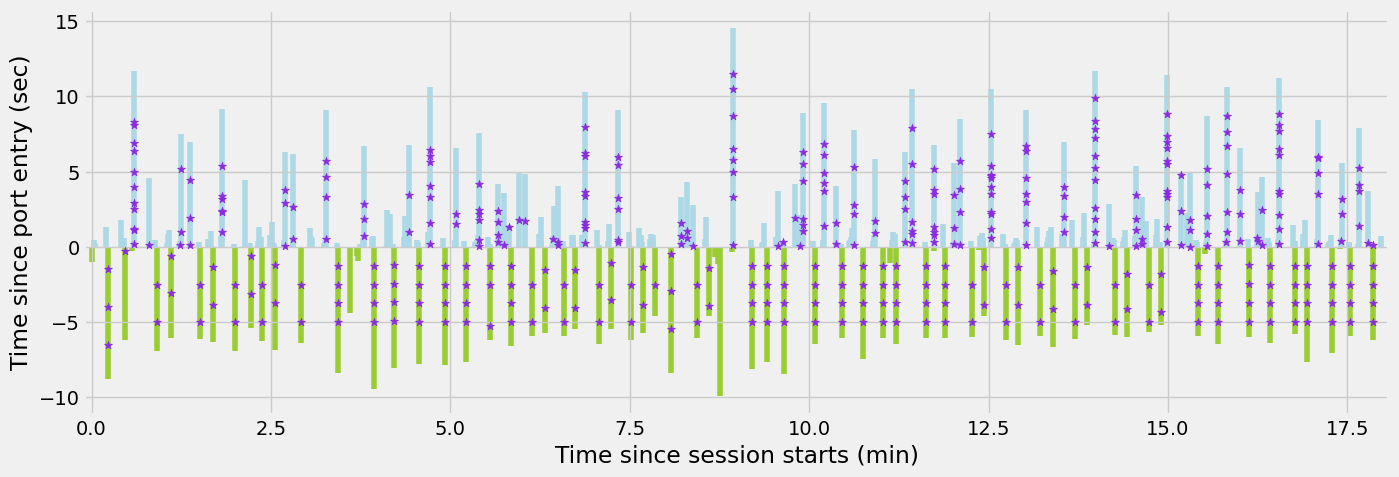

In [8]:
plot_behav_events(pi_events)

In [9]:
import matplotlib
import matplotlib.pyplot as plt


def plot_behav_in_patches(pi_events):
    pi_trials = extract_raw_trial(pi_events)
    fig, ax1 = plt.subplots(figsize=(15, 5))
    plt.style.use('fivethirtyeight')
    for i in range(len(pi_trials.index)):
        x = pi_trials.entry[i]
        height = pi_trials.stay[i] * pi_trials.port_sign[i]
        width = pi_trials.stay[i]/60
        if pi_trials.port_sign[i] > 0:
            c = 'lightblue'
        else:
            c = 'yellowgreen'
        rect = matplotlib.patches.Rectangle([x/60, 0], width, height, fc = c, alpha = 1, zorder = 0)
        ax1.add_patch(rect)

        if len(pi_trials.rewards[i]) > 0:
            y_reward_time = (pi_trials.rewards[i] - x) * pi_trials.port_sign[i]
            x_reward_time = [x/60 for x in pi_trials.rewards[i]]
            plt.scatter(x_reward_time, y_reward_time, c='blueviolet', marker='*', zorder=1)

    # todo: make histogram of lick frequencies
    # todo: find a way to quantify if the mouse is engaged in the task (in-port vs. in-between?)
    # todo: quantify how often the unwanted in-and-out occurs

    plt.xlabel("Time since session starts (min)")
    plt.ylabel("Time since port entry (sec)")
    plt.xlim([-0.1,max(pi_trials.exit)/60 + 0.1])

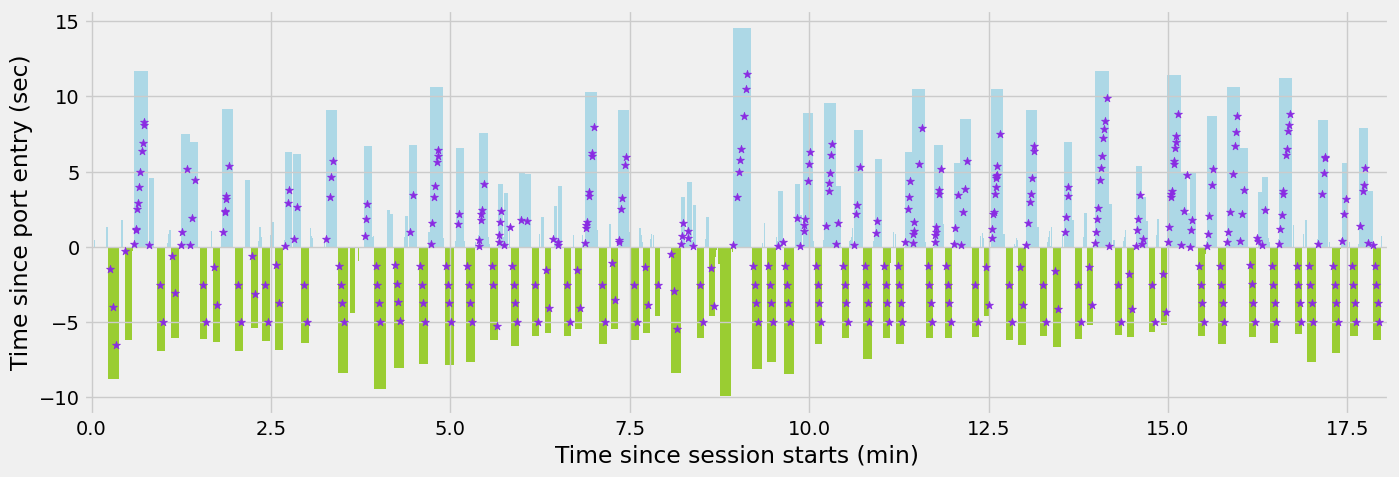

In [10]:
plot_behav_in_patches(pi_events)

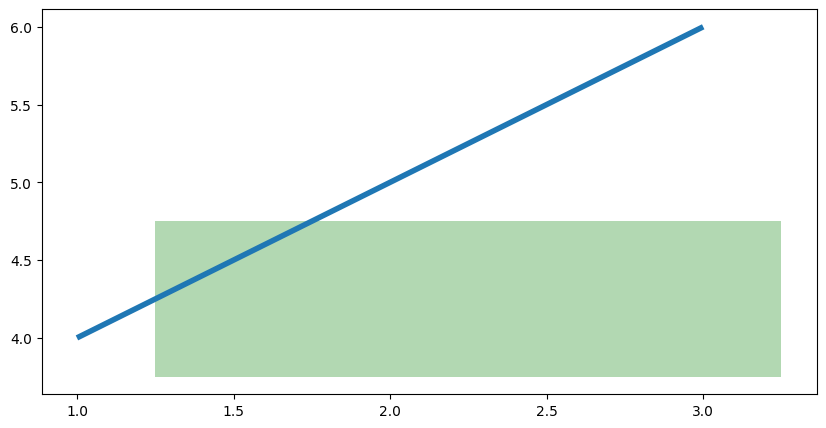

In [1]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.style.use('fivethirtyeight')
plt.plot([1,2,3], [4,5,6])
rect = matplotlib.patches.Rectangle((1.25, 4.75), 2, -1, ec = 'none', fc = 'green', alpha = 0.3)
ax1.add_patch(rect)
